
<h2 align="center">Visual illusions and interactions in biologically inspired neural networks. Analyzing perception of tilt</h2> 

Below are some functions definitions that we will need 

In [1]:
# Imports
import math as m
import numpy as np
import matplotlib.pyplot as plt
import holoviews as hv
import pylab as pl
from pylab import exp,cos,sin,pi,tan, pi
import pandas as pd
import seaborn as sb
import holoviews as hv
from IPython.display import SVG
import io
from PIL import Image
from random import random
import elastica as el
import elastica_neurons as en
from dynamics import *
%matplotlib inline
hv.notebook_extension()

/usr/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
%output max_frames = 2000

Set breakpoint in notebooks(and python in general)

In [3]:
#import pdb; pdb.set_trace()

In [ ]:
# Output of different orientation selective neurons for given orienatation
k = 0.25;
A = 3;
data = {angle:(mises_curve(A,k,angle))
        for angle in np.arange(0, pi, 0.1)}
levels = hv.HoloMap(data, kdims=['Angle']).collate()
levels

This time we specify number of orientation selective neurons as well.

In [3]:
# Generate the data
angle_neurons = [(angle,neurons) for angle in np.arange(0, pi, 0.1) for neurons in range(1,30,1)]
data = [(angle_neuron, mises_curve(A,k,*angle_neuron)) for angle_neuron in angle_neurons]
len(data)

928

In [ ]:
# Display the responses
vonMises = hv.HoloMap(data, kdims=['Angle', 'Neurons'])
vonMises

In [ ]:
# Visualization of orienatations

from random import random


renderer = hv.Store.renderers['matplotlib'].instance(fig='svg', holomap='gif')


x_ind = []
y_ind = []
theta = []
#theta = np.pi*np.arange(100)/100
theta = np.pi*np.random.rand(100)
for i in range(0,10):
    for j in range(0,10):
        x_ind.append(i)
        y_ind.append(j)
        #theta.append(random())
        
bars1 = plotbar(x_ind,y_ind,theta,l=0.9)
#hv.help(bars1)
renderer.save(bars1, 'example_I')

SVG(filename='example_I.svg')


In [ ]:
# Visualization of orienatations

from random import random


renderer = hv.Store.renderers['matplotlib'].instance(fig='svg', holomap='gif')


x_ind = []
y_ind = []
theta = []
theta = np.pi*np.arange(100)/100
for i in range(0,10):
    for j in range(0,10):
        x_ind.append(i)
        y_ind.append(j)
        #theta.append(random())
        
bars1 = plotbar(x_ind,y_ind,theta,l=0.9)

bars1


In [321]:
# Visualization of orienatations

from random import random


renderer = hv.Store.renderers['matplotlib'].instance(fig='svg', holomap='gif')

bars = []
for k in range(10):
    x_ind = []
    y_ind = []
    theta = []
    for i in range(0,10):
        for j in range(0,10):
            x_ind.append(9-i)
            y_ind.append(j)
            theta.append(random())
    bars1 = plotbar(x_ind,y_ind,theta,l=0.9)
    bars1 = plotbar(x_ind,y_ind,theta,l=0.9)
    #hv.help(bars1)
    renderer.save(bars1, 'test/example_'+str(k), plot= dict(Curve={'yaxis':None, 'xaxis':None}))


In [ ]:
a = SVG(filename='example_I.svg')
a


In [ ]:
theta = np.reshape(theta, ((10,10)))
f = open('test.txt','w')
f.write(np.array_str(theta.T, precision=2))
f.close()
print (np.array_str(theta.T, precision=2))

In [ ]:
'''
bars = []
for k in range(10):
    a = SVG(filename='test/example_' + str(k) + '.svg')
    bars.append((k,a))
    
surface_wind = hv.HoloMap(bars, kdims=['d'])
surface_wind
'''


Holoviews (Matlab as well) come with fairly limited number of plotting colors (5). This means that after plotting more than five curves, the colors will start repeating, leading to confusing plots. This methods goes inside the variable in the Holoviews library, responsible for cycling the different colors for plotting. The colors are based on different value of hue, with the same values for saturation and value, so we get a nice gamma of different colors. The number of colors can be set, so depending on the need of colors, we get the best contrast.

Translation from Matlab to Python - indexing of matrices - Matlab:row first, column second, Python the opposite


Limited connectivity

[ 1.57079633  3.14159265  2.35619449  3.92699082]
1.57079632679
2.35619449019
3.14159265359
3.92699081699


:Layout
   .HoloMap.I  :HoloMap   [X,Y]
      :Curve   [x]   (y)
   .HoloMap.II :HoloMap   [X,Y]
      :Overlay
         .Points.I    :Points   [x,y]
         .Points.II   :Points   [x,y]
         .Points.III  :Points   [x,y]
         .Points.IV   :Points   [x,y]
         .Points.V    :Points   [x,y]
         .Points.VI   :Points   [x,y]
         .Points.VII  :Points   [x,y]
         .Points.VIII :Points   [x,y]
         .Points.IX   :Points   [x,y]
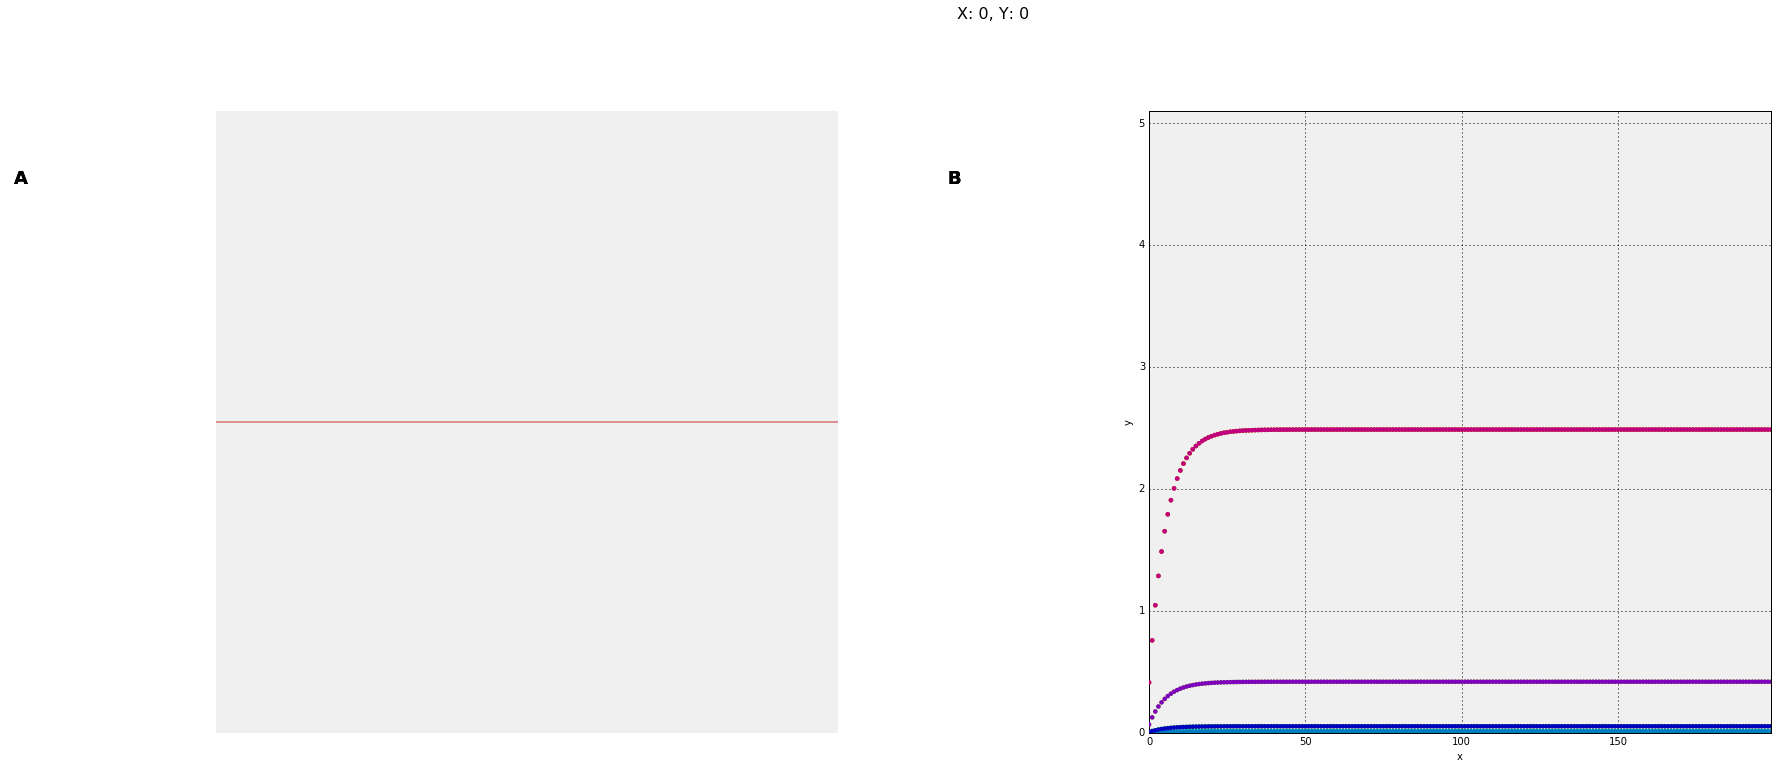
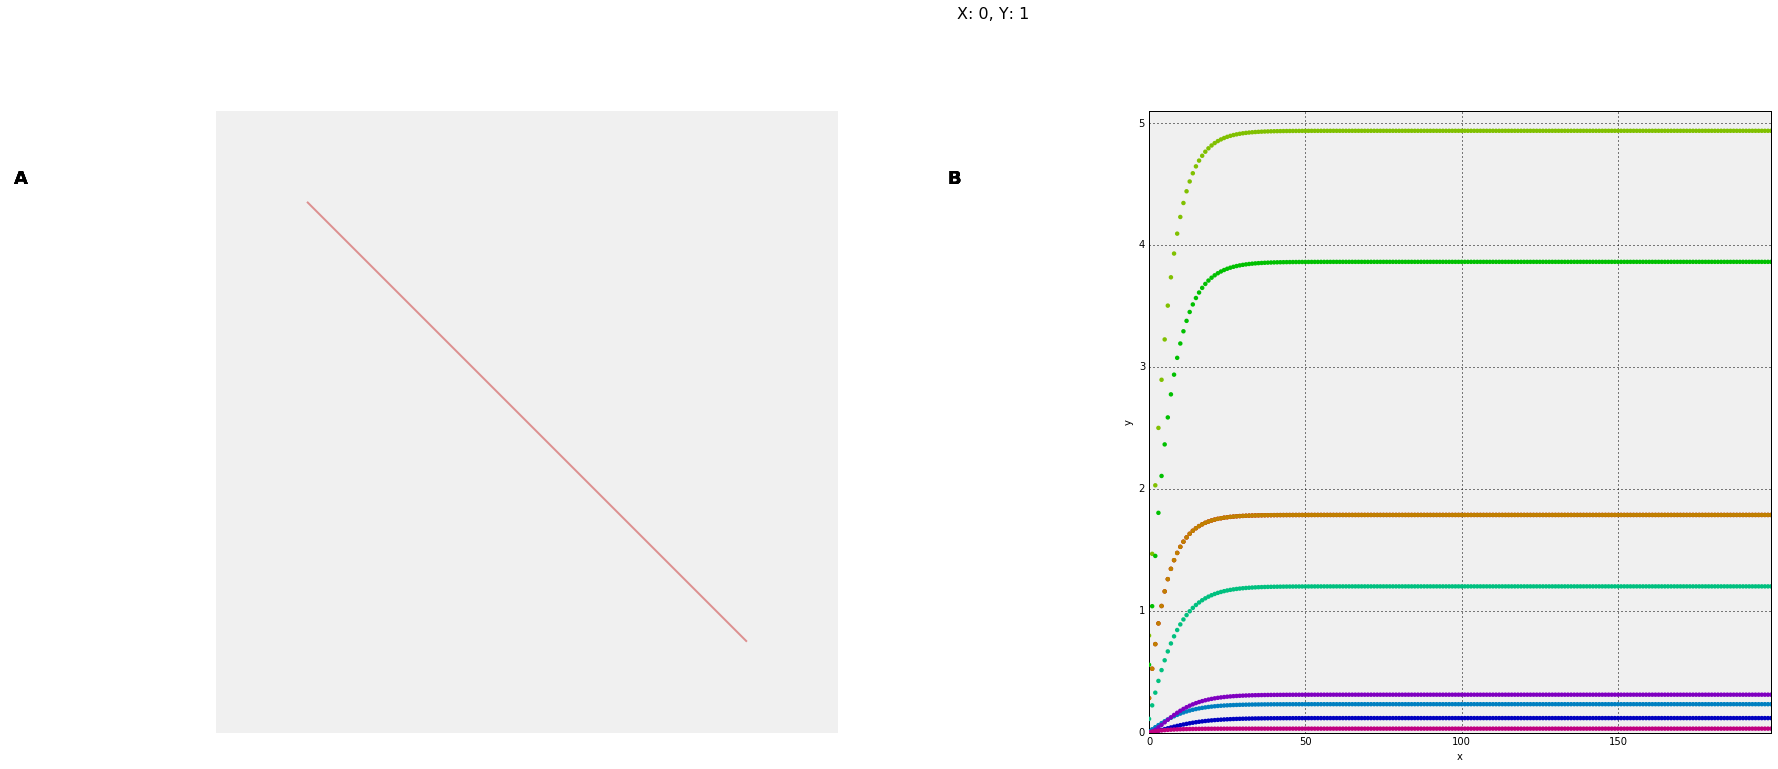
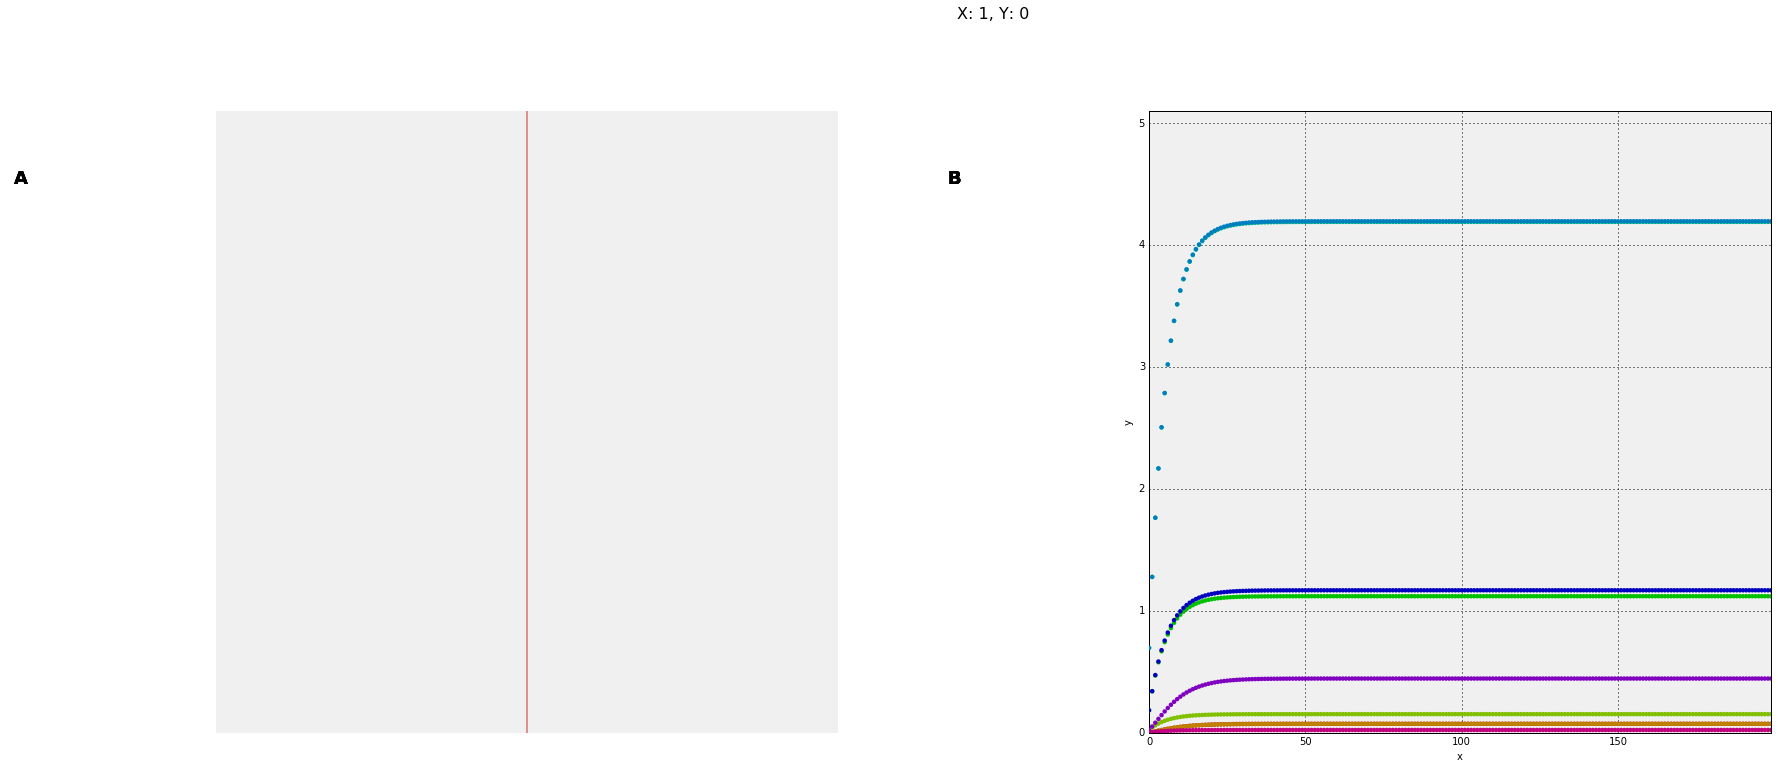
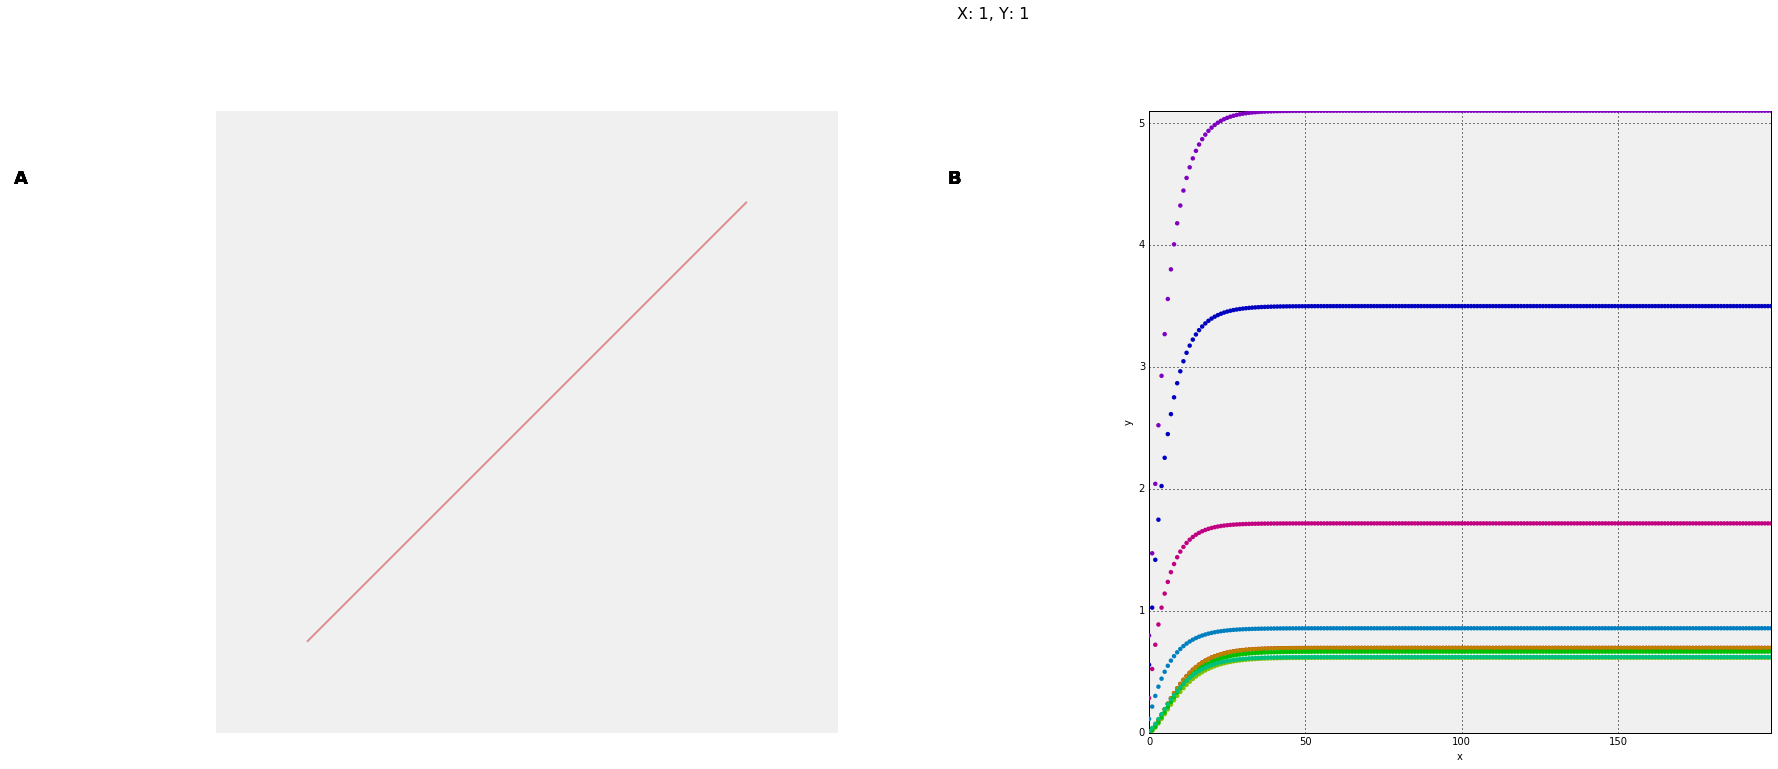

In [2]:
%%output size=300
m = 2
n = 2
tau = 6
# Number of orientation selective neurons
nosn = 9
timesteps = 200
# for vonMises function
k = 0.25
A = 3
# Set the number of colors for plotting, based on the number of orientation selective neurons
setNumberOfColors(nosn)

orientations = np.arange(0, np.pi, np.pi/nosn)
#ac_orient = np.random.rand(m,n)
ac_orient = np.reshape(np.pi*np.arange(m*n)/(m*n), (m,n))
responses = np.zeros((nosn, timesteps))
t = np.arange(0,timesteps,1)

spikes = vonMises(A,k,ac_orient,orientations)
r = np.zeros(spikes.shape)
drdt = spikes/tau
rs = np.zeros(spikes.shape + (len(t),))

for i in range(len(t)):
    r = r + drdt
    r_pad = np.lib.pad(r, 1, padwithzeros)
    r_pad = r_pad[1:,:,:]
    r_pad = r_pad[-r_pad.shape[0]+1:,:,:]
    near_r = r_pad[:,0:m,0:n] + r_pad[:,1:m+1,0:n] + r_pad[:,2:m+2,0:n] + r_pad[:,0:m,1:n+1] 
    + r_pad[:,2:m+2,1:n+1] + r_pad[:,0:m,2:n+2] + r_pad[:,1:m+1,2:n+2] + r_pad[:,2:m+2,2:n+2]
    drdt = (-r + spikes)/tau + 0.02*near_r
    rs[:,:,:,i] = r

#r_first_neuron = rs[:,1,1,:]
dimensions = ['X', 'Y']
keys = [(i,j) for i in range(m) for j in range(n)]
r_first_neuron_hm = [(k, plotOneField(k,t,nosn,rs)) for k in keys]
sections = hv.HoloMap(r_first_neuron_hm, kdims=dimensions)
vf = visualField(ac_orient)
vf_holomap = hv.HoloMap([(k, visualField(ac_orient[k])) for k in keys], kdims=dimensions)
vf_holomap+sections

1.57079632679
1.91986217719
2.26892802759
2.61799387799
2.96705972839
3.31612557879
3.66519142919
4.01425727959
4.36332312999


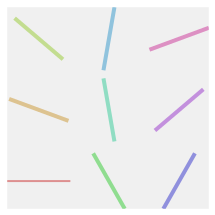

In [3]:
visualField2(orientations.reshape(3,3))

[ 0.          1.57079633  0.78539816  2.35619449]


:Curve   [x]   (y)
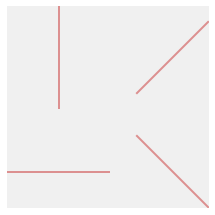

In [230]:
visualField(ac_orient)

0.785398163397


:Curve   [x]   (y)
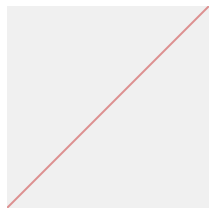

In [238]:
visualField(np.array(np.pi/4))

[ 1.57079633  3.14159265  2.35619449  3.92699082]


:Curve   [x]   (y)
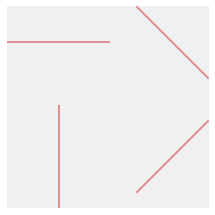

In [240]:
visualField(ac_orient)

3.14159265359


:Curve   [x]   (y)
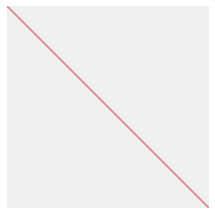

In [221]:
visualField(ac_orient[1,0])

In [241]:
ac_orient

array([[ 0.        ,  0.78539816],
       [ 1.57079633,  2.35619449]])

In [15]:
def plotbar(x,y,th,color='k',width=2,l=1):
    ''' 
    Plot a single bar 
    x,y: location middle of bar
    th(eta): orientation
    color: color (default = black)
    width: linewidth (default = 2)
    l:     line length (default = 1)
    Returns a holoviews curve object
    '''
    th = np.asarray(th)
    th = th + np.pi/2 # so that the orientation is relative to the vertical
    print(th)
    hl = l/2 # half length bar
    
    # define x and y points of bar
    X = [x-pl.sin(th)*hl,x+pl.sin(th)*hl]
    Y = [y-pl.cos(th)*hl,y+pl.cos(th)*hl]
    
    # return holoviews curve
    curve = hv.Curve(zip(X,Y))
    return curve(plot={'yaxis':None, 'xaxis':None})(style={'alpha':0.4, 'linewidth':width})    

In [467]:
(direction, magnitude) = populationVector(orientations, rs, nosn, timesteps)

In [472]:
magnitude[:,:,0]

array([[ 1.48282627,  1.48251386],
       [ 1.48220139,  1.48251386]])

In [471]:
direction[:,:,0]

array([[ 0.        ,  0.78529771],
       [ 1.57079633,  2.35629494]])

In [431]:
a = list(ac_orient.shape)
a.append(1)
b = np.reshape(ac_orient,a)
c = np.repeat(b,200,axis=2)
c.shape


(5, 5, 200)

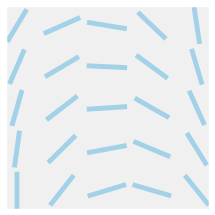

In [459]:
visualField3(direction[:,:,1], magnitude[:,:,1])

In [466]:
np.arange(m*n)

array([0, 1, 2, 3])

Full connectivity

In [94]:
%%output size=300
m = 10
n = 10
tau = 6
# Number of orientation selective neurons
nosn = 9
timesteps = 10
# for vonMises function
k = 0.25
A = 3
# for the weight matrix
distance_scaling = 0.00005
orientation_scaling = 0.00005
# Set the number of colors for plotting, based on the number of orientation selective neurons
setNumberOfColors(nosn)

orientations = np.arange(0, np.pi, np.pi/nosn)
#ac_orient = np.random.rand(m,n)
ac_orient = np.reshape(np.pi*np.arange(m*n)/(m*n), (m,n))
responses = np.zeros((nosn, timesteps))
t = np.arange(0,timesteps,1)

spikes_ = vonMises(A,k,ac_orient,orientations)
spikes = spikes_.ravel()
r = np.zeros(len(spikes))
drdt = spikes/tau
rs = np.zeros(spikes.shape + (len(t),))
matrix = np.load(matrix_file)
matrix_file.seek(0)
matrix
#weight_matrix = covarianceMatrix(np.ones((m,n,nosn)), distance_scaling, orientation_scaling)
for s in range(len(t)):
    r = r + drdt
    drdt = (-r + spikes)/tau + np.dot(weight_matrix,r)
    rs[:,s] = r

#r_first_neuron = rs[:,1,1,:]
dimensions = ['X', 'Y']
keys = [(i,j) for i in range(m) for j in range(n)]
r_first_neuron_hm = [(k, plotOneField(k)) for k in keys]
sections = hv.HoloMap(r_first_neuron_hm, kdims=dimensions)
vf = visualField(ac_orient)
vf_holomap = hv.HoloMap([(k, visualField(ac_orient[k])) for k in keys], kdims=dimensions)
vf_holomap+sections

IndexError: too many indices for array

In [45]:
spikes_.shape

(9, 10, 10)

In [5]:
orientations4.shape

(9, 10, 10)

In [13]:
import elastica as el
import elastica_neurons as en
import inspect
import numpy as np

nosn = 9
orientations = np.arange(0, np.pi, np.pi/nosn)

orientations2 = np.expand_dims(orientations, axis=1)
orientations3 = np.expand_dims(orientations2, axis=2)
orientations4 = np.tile(orientations3, (1, 10, 10))
orientations4.shape
vector_length = np.size(orientations4.ravel())
matrix = np.zeros((vector_length, vector_length))

en.E(np.pi,np.pi,[0,1])



array([  7.19884696e-31])

In [33]:
m = 10
n = 10
nosn = 9
distance_scaling = 0.00005
orientation_scaling = 0.00005
np.size(np.ones((m,n,nosn)))
a = covarianceMatrix(np.ones((m,n,nosn)),distance_scaling,orientation_scaling)
a.shape
imshow(a)


NameError: name 'imshow' is not defined

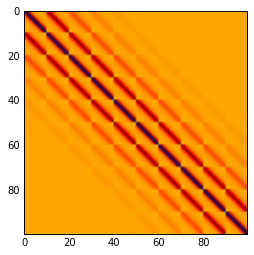

In [34]:
plt.imshow(a[0:100,0:100])

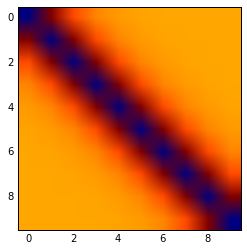

In [548]:
imshow(a[0:10,0:10])


In [35]:
from tempfile import TemporaryFile
matrix_file = TemporaryFile()
np.save(matrix_file, a)
matrix_file.seek(0)

In [37]:
matrix = np.load(matrix_file)
matrix_file.seek(0)
matrix

array([[  0.00000000e+00,   6.83939721e-05,   5.67667642e-05, ...,
          1.83945309e-05,   1.83942668e-05,   1.83941204e-05],
       [  6.83939721e-05,   0.00000000e+00,   6.83939721e-05, ...,
          1.83949752e-05,   1.83945309e-05,   1.83942668e-05],
       [  5.67667642e-05,   6.83939721e-05,   0.00000000e+00, ...,
          1.83956611e-05,   1.83949752e-05,   1.83945309e-05],
       ..., 
       [  1.83945309e-05,   1.83949752e-05,   1.83956611e-05, ...,
          0.00000000e+00,   6.83939721e-05,   5.67667642e-05],
       [  1.83942668e-05,   1.83945309e-05,   1.83949752e-05, ...,
          6.83939721e-05,   0.00000000e+00,   6.83939721e-05],
       [  1.83941204e-05,   1.83942668e-05,   1.83945309e-05, ...,
          5.67667642e-05,   6.83939721e-05,   0.00000000e+00]])

In [4]:
m = 2
n = 3
p = 4
test = np.reshape(np.arange(m*n*p), (m,n,p))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])